In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression

---

In [4]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 
              'view':int}

---

Write your own function called ‘polynomial_sframe’ (or otherwise) which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame (e.g. SFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [5]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

---

For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [6]:
sales = pd.read_csv('./data/kc_house_data.csv', dtype=dtype_dict, index_col=0)
sales = sales.sort_values(['sqft_living','price'])

---

Make a 1 degree polynomial SFrame with sales\[‘sqft_living’\] as the the feature. Call it ‘poly1_data’.

In [7]:
poly1_data = polynomial_dataframe(sales.sqft_living, 1)

Add sales\[‘price’\] to poly1_data as this will be our output variable.

In [8]:
poly1_data['price'] = sales.price

---

Use graphlab.linear_regression.create (or another linear regression library) to compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope.

In [9]:
model1 = LinearRegression().fit(X=poly1_data.loc[:,['power_1']], y=poly1_data.price)

In [10]:
model1.coef_, model1.intercept_

(array([280.6235679]), -43580.74309447396)

---

Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model.

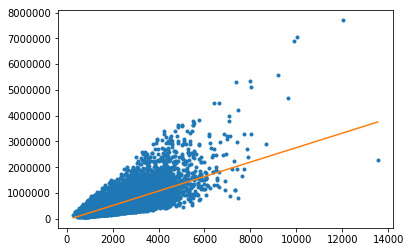

In [11]:
plt.plot(poly1_data['power_1'], poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(poly1_data.loc[:,['power_1']]),'-')
pass

---

In [12]:
def poly_regression(feature, y, degree):
    poly_data = polynomial_dataframe(feature, degree)
    poly_data['price'] = y
    end_col = 'power_' + str(degree)
    poly_model = LinearRegression().fit(X=poly_data.loc[:,'power_1':end_col], y=poly_data.price)
    print(poly_model.coef_, poly_model.intercept_)
    plt.plot(poly_data['power_1'], poly_data['price'],'.',
             poly_data['power_1'], poly_model.predict(poly_data.loc[:,'power_1':end_col]),'-')

---

Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

[6.79940947e+01 3.85812609e-02] 199222.27930548496


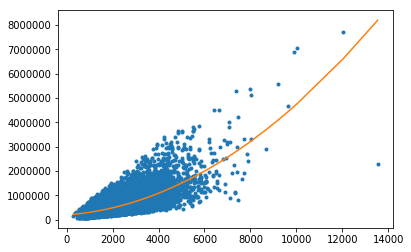

In [13]:
poly_regression(sales.sqft_living, sales.price, 2)

[-9.01819864e+01  8.70465089e-02 -3.84055260e-06] 336819.7482214633


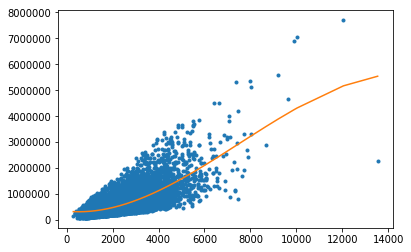

In [14]:
poly_regression(sales.sqft_living, sales.price, 3)

---

Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

[ 4.56404164e-91  6.91713475e-51  2.57712471e-56  2.78197887e-88
  1.19863929e-74  2.68575522e-71  2.26147568e-67  1.85900299e-63
  1.47144116e-59  1.09771012e-55  7.43509038e-52  4.23015578e-48
  1.61618577e-44 -2.49283826e-48  9.59718336e-53] 537116.3296377048


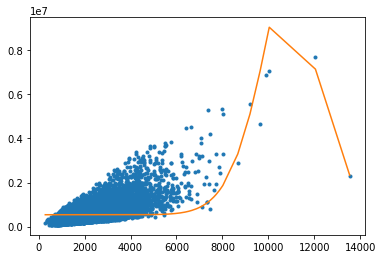

In [15]:
poly_regression(sales.sqft_living, sales.price, 15)

---

Create four subsets.

In [16]:
set_1 = pd.read_csv('./data/wk3_kc_house_set_1_data.csv', 
                    dtype=dtype_dict, index_col=0).sort_values(['sqft_living','price'])
set_2 = pd.read_csv('./data/wk3_kc_house_set_2_data.csv', 
                    dtype=dtype_dict, index_col=0).sort_values(['sqft_living','price'])
set_3 = pd.read_csv('./data/wk3_kc_house_set_3_data.csv', 
                    dtype=dtype_dict, index_col=0).sort_values(['sqft_living','price'])
set_4 = pd.read_csv('./data/wk3_kc_house_set_4_data.csv', 
                    dtype=dtype_dict, index_col=0).sort_values(['sqft_living','price'])

---

Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

[ 3.05794168e-90 -1.69394947e-49 -5.61767587e-55 -4.97841222e-60
  3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
  4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
  3.62176959e-44 -5.63501661e-48  2.18641116e-52] 539058.8186681452


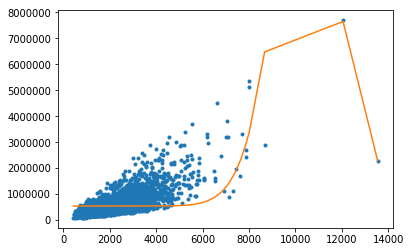

In [17]:
poly_regression(set_1.sqft_living, set_1.price, 15)

[ 2.71335949e-77  7.33541092e-39 -1.85014873e-44  8.43742361e-50
  5.73786179e-71  1.51934987e-58  3.64549616e-55  1.50416258e-51
  5.76015665e-48  1.95770497e-44  5.39396539e-41  9.40376360e-38
 -3.63529141e-41  4.65476524e-45 -1.97199241e-49] 506864.0083774065


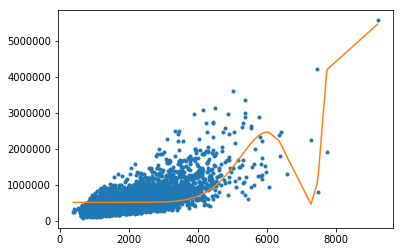

In [18]:
poly_regression(set_2.sqft_living, set_2.price, 15)

[ 2.83751934e-88 -7.80224148e-49 -1.38767183e-55  3.98272978e-59
  1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
  9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
  3.33756141e-43 -6.76238818e-47  3.43132932e-51] 530874.316653332


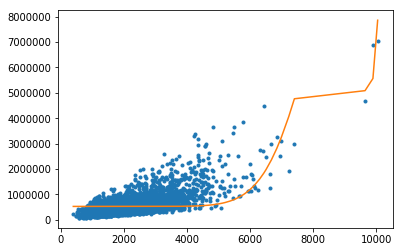

In [19]:
poly_regression(set_3.sqft_living, set_3.price, 15)

[ 1.37116050e-76  2.79678201e-40 -2.13063569e-44 -5.68255813e-49
  2.58420327e-70  5.29002498e-58  1.27070046e-54  4.87868972e-51
  1.73549022e-47  5.47058320e-44  1.39587599e-40  2.25041871e-37
 -9.43954119e-41  1.31573060e-44 -6.09163414e-49] 494818.96216118964


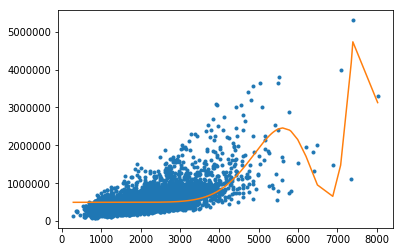

In [20]:
poly_regression(set_4.sqft_living, set_4.price, 15)

---

Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree. If you’re using SFrames then create a training, validation and testing subsets as follows:

- First split sales into training_and_validation and testing with sales.random_split(0.9) use seed = 1!
- Next split training_and_validation into training and validation using .random_split(0.5) use seed = 1!

In [21]:
train_data = pd.read_csv('./data/wk3_kc_house_train_data.csv', dtype=dtype_dict, index_col=0)
valid_data = pd.read_csv('./data/wk3_kc_house_valid_data.csv', dtype=dtype_dict, index_col=0)
test_data = pd.read_csv('./data/wk3_kc_house_test_data.csv', dtype=dtype_dict, index_col=0)

---

Now for each degree from 1 to 15:

- Build an polynomial data set using training_data\[‘sqft_living’\] as the feature and the current degree
- Add training_data\[‘price’\] as a column to your polynomial data set
- Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
- Compute the RSS on VALIDATION for the current model (print or save the RSS)

In [22]:
for k in range(1,16):
    df_Tr = polynomial_dataframe(train_data.sqft_living, k)
    df_Tr['price'] = train_data.price
    df_Va = polynomial_dataframe(valid_data.sqft_living, k)
    df_Va['price'] = valid_data.price
    end_col = 'power_' + str(k)
    poly_model = LinearRegression().fit(X=df_Tr.loc[:,'power_1':end_col], y=df_Tr.price)
    yhat = poly_model.predict(df_Va.loc[:,'power_1':end_col])
    y = df_Va.price
    RSS = np.sum((y - yhat)**2)
    print(k, '{:,}'.format(RSS))

1 629,097,886,299,585.8
2 623,955,062,706,518.0
3 625,820,280,251,531.0
4 629,987,341,468,500.5
5 628,240,679,314,420.9
6 566,268,593,934,056.0
7 1,073,845,792,802,398.6
8 7,087,731,525,068,529.0
9 4.530345223846528e+16
10 2.475686241299034e+17
11 1.193801479215099e+18
12 5.093260375057912e+18
13 7.616230021287881e+17
14 2.2975609250063524e+18
15 6.955038097243406e+18


[ 7.87223777e-12  4.72647591e-09  4.06060003e-05 -1.10234944e-08
  1.19366591e-12 -4.40294936e-17] 292893.00485361804


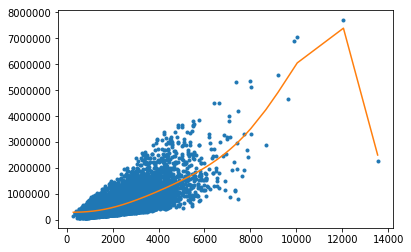

In [23]:
poly_regression(sales.sqft_living, sales.price, 6)

---

Now that you have selected a degree compute the RSS on TEST data for the model with the best degree from the Validation data.

In [24]:
df_Tr = polynomial_dataframe(train_data.sqft_living, 6)
df_Tr['price'] = train_data.price
df_Te = polynomial_dataframe(test_data.sqft_living, 6)
df_Te['price'] = test_data.price

poly_model = LinearRegression().fit(X=df_Tr.loc[:,'power_1':'power_6'], y=df_Tr.price)
yhat = poly_model.predict(df_Te.loc[:,'power_1':'power_6'])
y = df_Te.price
RSS_Te = np.sum((y - yhat)**2)

In [25]:
print('{:,}'.format(RSS_Te))

135,225,114,656,622.97
